In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing  import StandardScaler
from ydata_profiling import ProfileReport
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')
sns.set_style("darkgrid")
scaler = StandardScaler()

In [3]:
df = pd.read_excel('bankruptcy-prevention.xlsx')
print(df.shape)

(250, 7)


In [4]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
profile = ProfileReport(df, explorative = True)
#profile.to_file("report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print("\nClass Distribution:")
print(df['class'].value_counts())
print("\nClass Distribution Percentage:")
print(df['class'].value_counts(normalize=True) * 100)


Class Distribution:
class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

Class Distribution Percentage:
class
non-bankruptcy    75.728155
bankruptcy        24.271845
Name: proportion, dtype: float64


In [9]:
%matplotlib inline

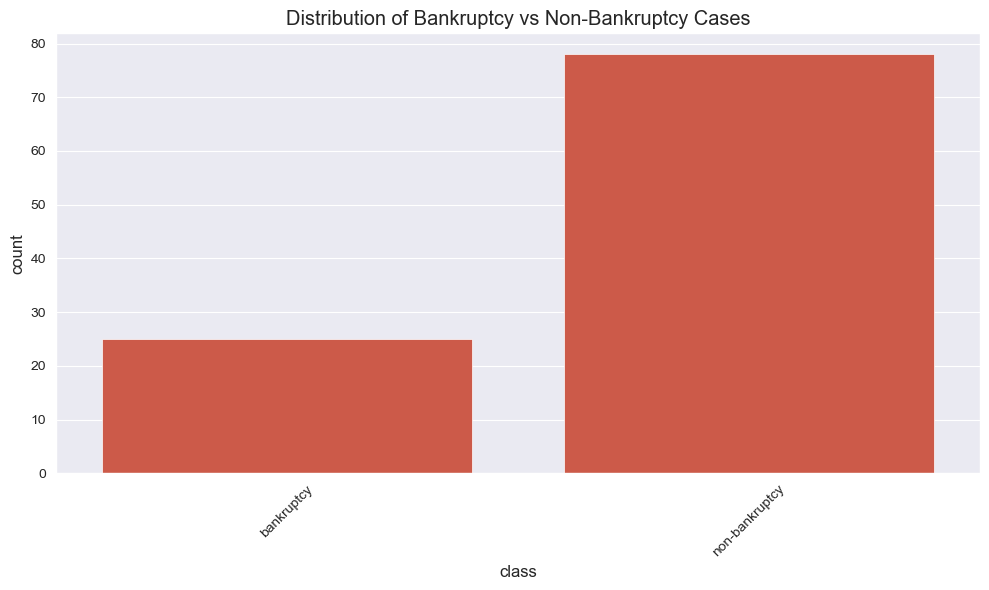

In [10]:
# Class Distribution Plot to viuzalise distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Bankruptcy vs Non-Bankruptcy Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

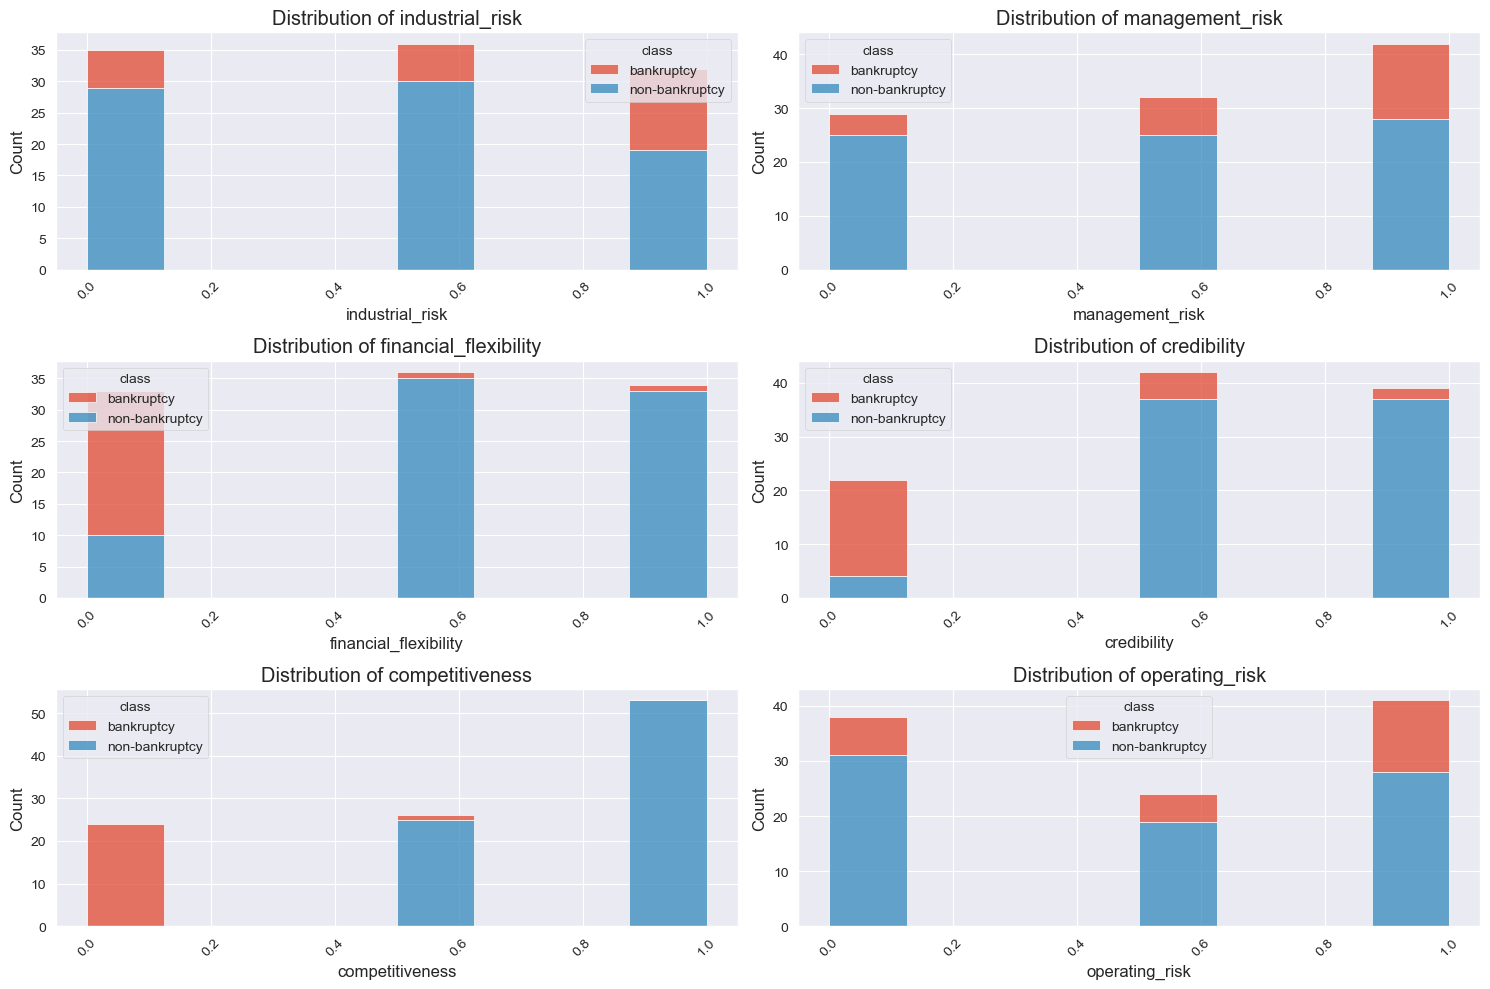

In [11]:
# Distribution of Features values w.r.t. traget classes
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=column, hue='class', multiple="stack")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

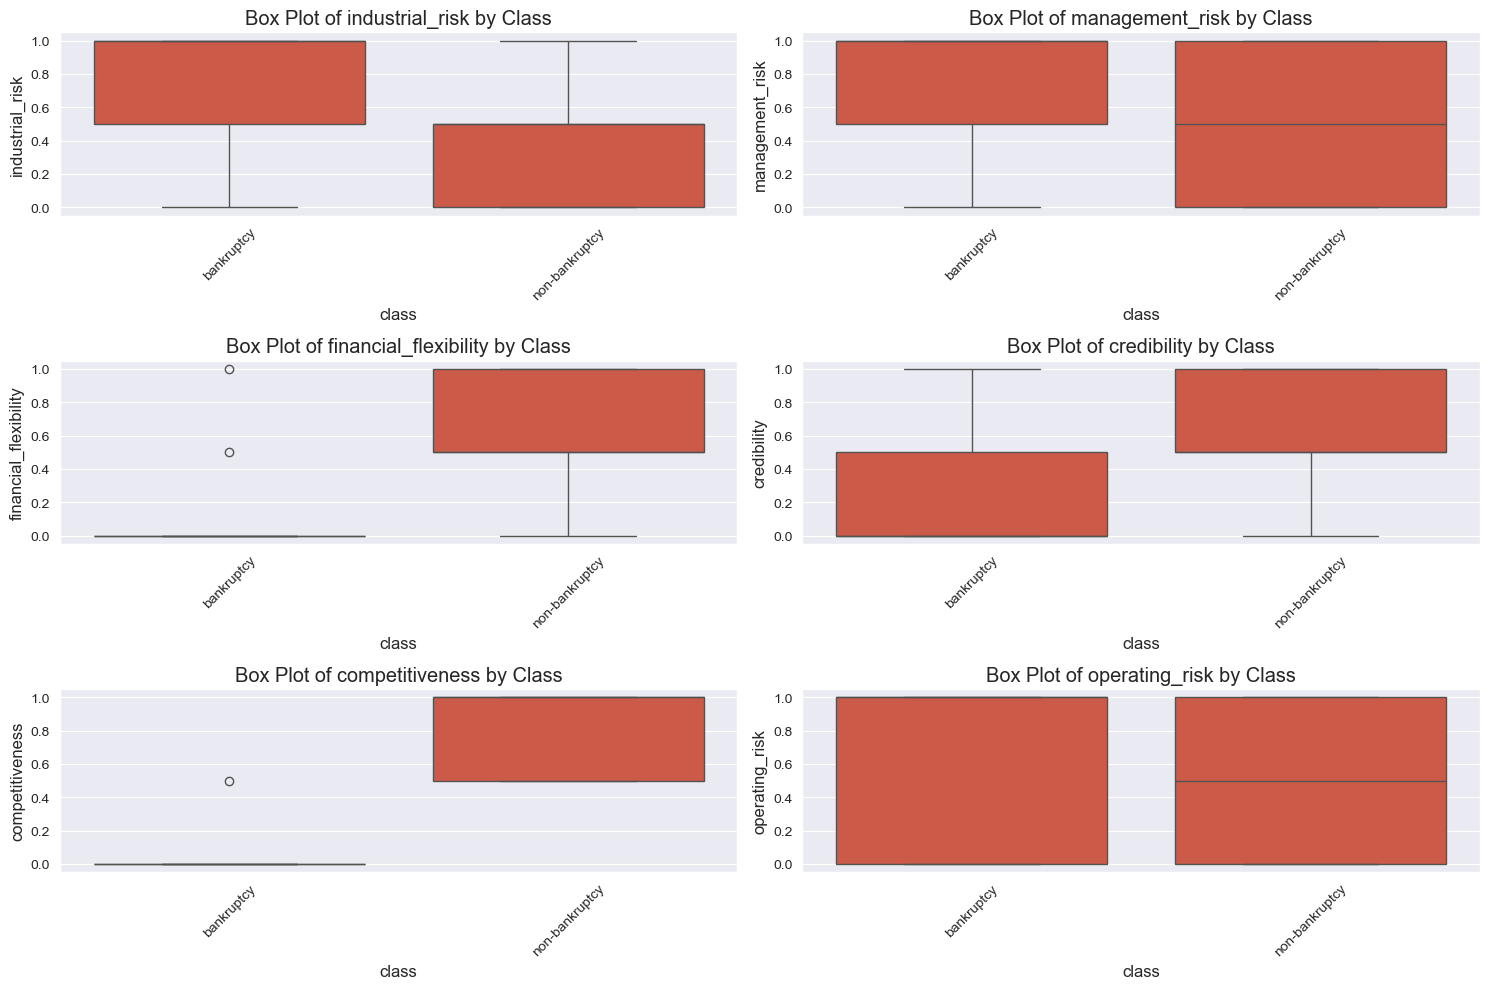

In [12]:
# Box plots for each feature by class w.r.t. target
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='class', y=column)
    plt.title(f'Box Plot of {column} by Class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

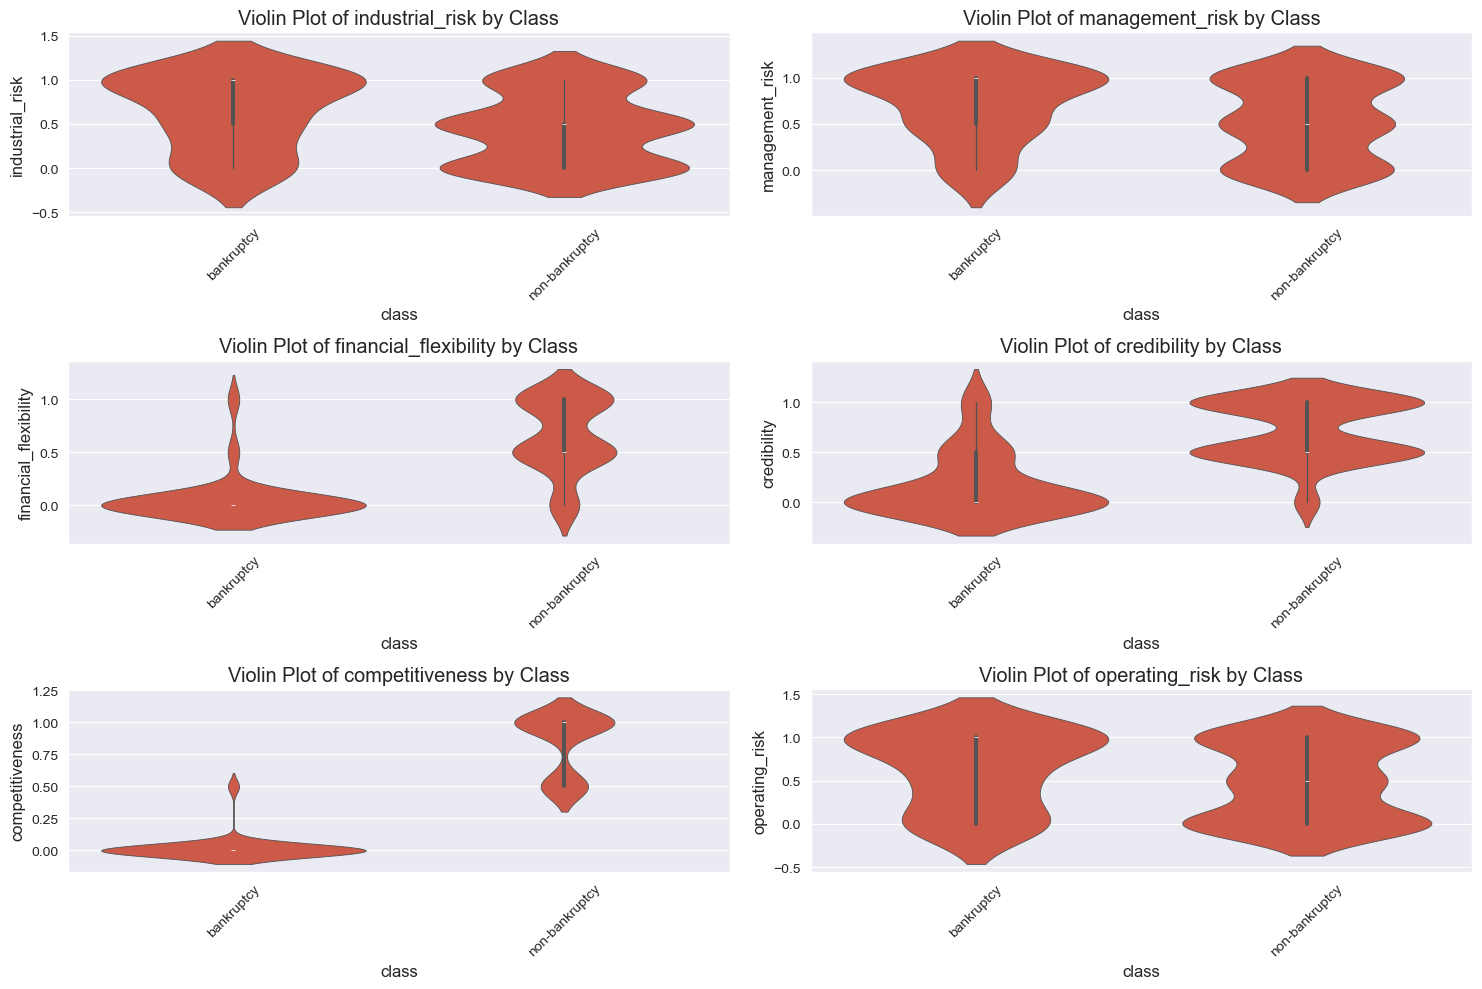

In [13]:
# Violin plots for each feature w.r.t. feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=df, x='class', y=column)
    plt.title(f'Violin Plot of {column} by Class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Create a copy of dataframe and convert target to numeric
df_corr = df.copy()
df_corr['target'] = (df_corr['class'] == 'bankruptcy').astype(int)

In [15]:
# creating correlation heatmap with target
features_for_target = [col for col in df_corr.columns if col != 'class']
target_correlation = df_corr[features_for_target].corr()

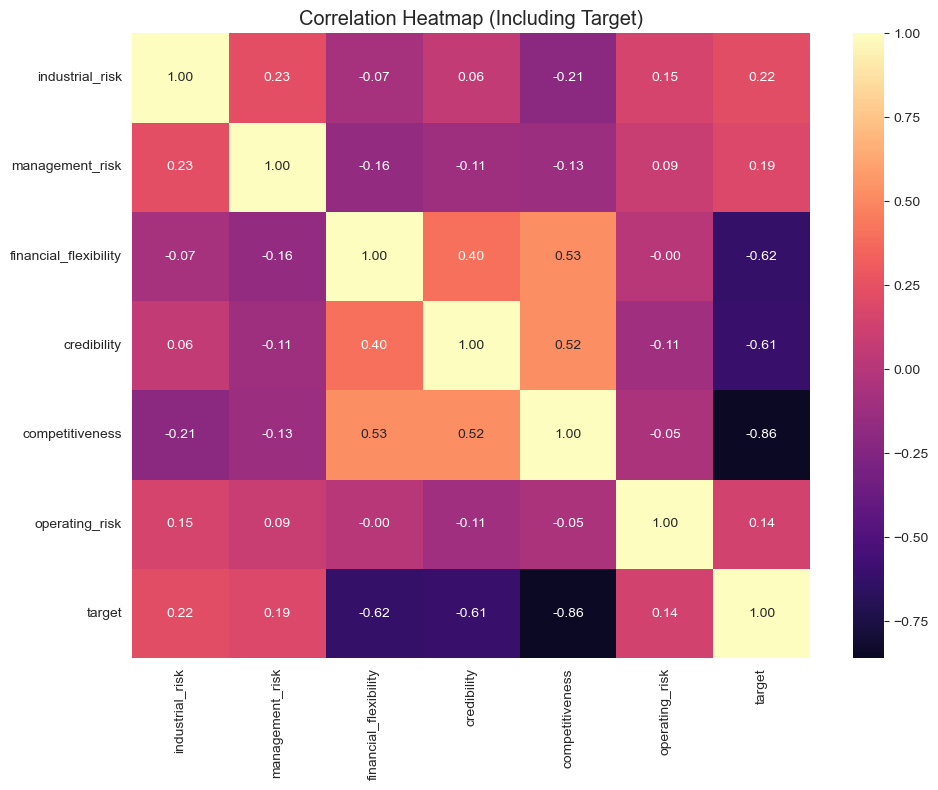

In [16]:
# Plotting correlation heatmap with target
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation, annot=True, cmap='magma', center=0, fmt='.2f')
plt.title('Correlation Heatmap (Including Target)')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [18]:
le = LabelEncoder()

In [19]:
# Splitting data features and target
X = df[['financial_flexibility','credibility','competitiveness','industrial_risk','management_risk','operating_risk']]
y = le.fit_transform(df['class'])
x = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Splitting Data into Test and Train set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)

#### Decision Tree Model

In [23]:
# Creating, training and using Decision Tree model to make predictions
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [24]:
# Accuracy, Classification report and Confusion matrix for Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Accuracy: {dt_accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, dt_y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, dt_y_pred))

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix:
 [[ 9  0]
 [ 0 22]]


In [25]:
with open("bankruptcydt-model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

#### Logistic Regression Model

In [27]:
# Creating, training and using Logistic Regression model to make predictions
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)

In [28]:
# Accuracy, Classification report and Confusion matrix for Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Accuracy: {lr_accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, lr_y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, lr_y_pred))

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix:
 [[ 9  0]
 [ 0 22]]


In [29]:
# Dumping Logistic Regression model
with open("bankruptcylr-model.pkl", "wb") as file:
    pickle.dump(lr_model, file)

#### XGBoost Classifier Model

In [31]:
# Creating, training and using XGB Classifier model to make predictions
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

In [32]:
# Accuracy, Classification report and Confusion matrix for XGB model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'Accuracy: {xgb_accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, xgb_y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, xgb_y_pred))

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix:
 [[ 9  0]
 [ 0 22]]


In [33]:
# Dumping XGB model
with open("bankruptcyxgb-model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

#### Support Vector Machine Model

In [35]:
# Creating, training and using SVM model to make predictions
from sklearn.svm import SVC
svm_model=SVC(kernel='linear',C=0.05,probability = True,random_state = 42)
svm_model.fit(X_train,y_train)
svm_y_pred = svm_model.predict(X_test)

In [36]:
# Accuracy, Classification report and Confusion matrix for SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Accuracy: {svm_accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, svm_y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix:
 [[ 9  0]
 [ 0 22]]


In [37]:
# Dumping SVM model
with open("bankruptcysvm-model.pkl", "wb") as file:
    pickle.dump(svm_model, file)

#### Random Forest Classifier Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, min_samples_split = 5, min_samples_leaf = 2, max_features = 'log2')
rf_model.fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)

In [40]:
# Accuracy, Classification report and Confusion matrix for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Accuracy: {rf_accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, rf_y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Confusion Matrix:
 [[ 9  0]
 [ 0 22]]


In [41]:
# Dumping Random Forest model
with open("bankruptcyrf-model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

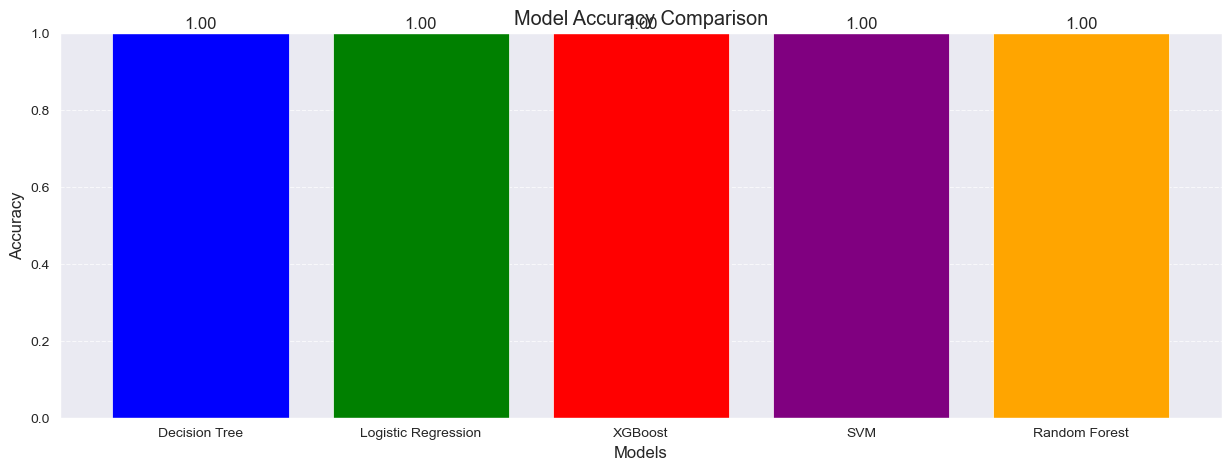

In [42]:
models = ['Decision Tree', 'Logistic Regression', 'XGBoost', 'SVM', 'Random Forest']
accuracies = [dt_accuracy, lr_accuracy, xgb_accuracy, svm_accuracy, rf_accuracy]

# Plot the comparison
plt.figure(figsize=(15, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()